In [7]:
import pandas as pd

# Upload the dataset
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('Electric_Production.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the column names
print(df.columns)


Saving Electric_Production.csv to Electric_Production (2).csv
       DATE  IPG2211A2N
0  1/1/1985     72.5052
1  2/1/1985     70.6720
2  3/1/1985     62.4502
3  4/1/1985     57.4714
4  5/1/1985     55.3151
Index(['DATE', 'IPG2211A2N'], dtype='object')


            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


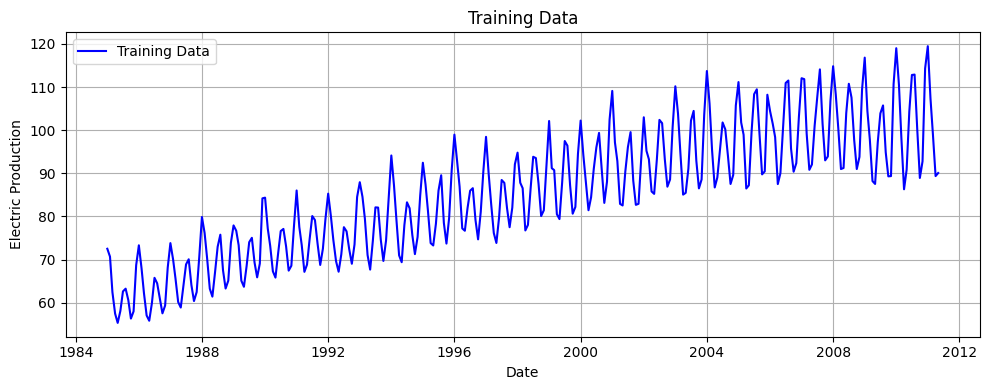

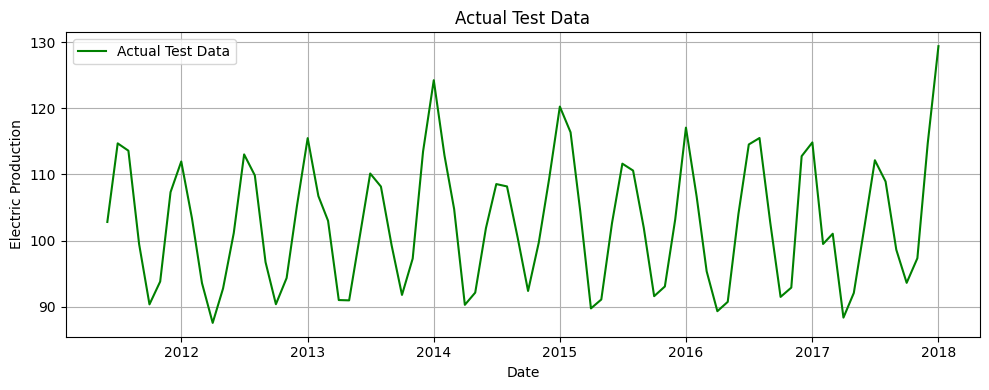

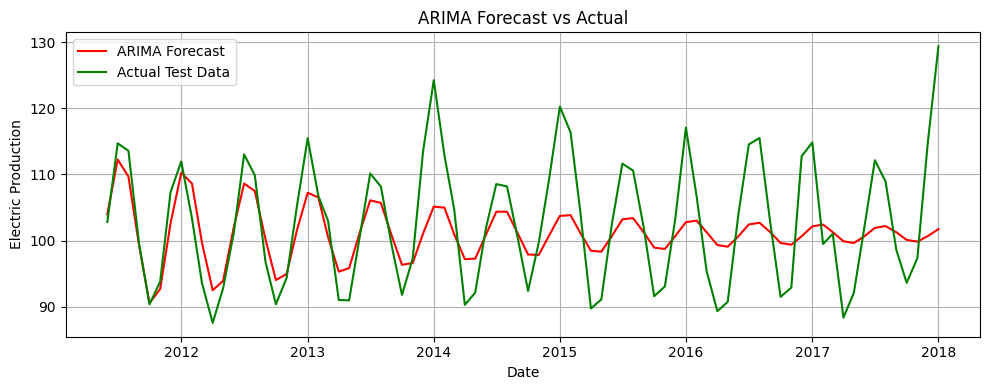

RMSE: 7.50


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset (use the correct column names for the date and electric production)
df = pd.read_csv('Electric_Production.csv', parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the dataset
print(df.head())

# Use the electric production data as the time series
time_series = df['IPG2211A2N']  # This is the column containing electric production values

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

# Fit ARIMA model (you can adjust the order of ARIMA for better results)
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) - tune for best performance
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# Plot training data
plt.figure(figsize=(10, 4))
plt.plot(train, label='Training Data', color='blue')
plt.title('Training Data')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot actual test data
plt.figure(figsize=(10, 4))
plt.plot(test, label='Actual Test Data', color='green')
plt.title('Actual Test Data')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot forecast vs actual
plt.figure(figsize=(10, 4))
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.plot(test, label='Actual Test Data', color='green')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}')
